In [1]:
from analysis import analyze_data_quality,  main_analysis, analyze_target_relationships
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from scipy import stats
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Chargement du dataset
random_data = pd.read_csv('dataset/random.csv')

In [3]:
random_data.head()

N°DPE Date_réception_DPE Date_établissement_DPE  \
0  2367E0834111W         2023-03-14             2023-03-13   
1  2335E2194416B         2023-06-29             2023-06-28   
2  2465E3436371T         2024-10-01             2024-09-30   
3  2344E0822003H         2023-03-13             2023-03-12   
4  2330E0798770E         2023-03-10             2023-03-09   

  Date_visite_diagnostiqueur                     Modèle_DPE N°_DPE_remplacé  \
0                 2023-03-13  DPE 3CL 2021 méthode logement             NaN   
1                 2023-06-28  DPE 3CL 2021 méthode logement             NaN   
2                 2024-09-30  DPE 3CL 2021 méthode logement             NaN   
3                 2023-03-12  DPE 3CL 2021 méthode logement             NaN   
4                 2023-03-09  DPE 3CL 2021 méthode logement             NaN   

  Date_fin_validité_DPE  Version_DPE  N°_DPE_immeuble_associé  \
0            2033-03-12          2.2                      NaN   
1            2033-06-27          2.3                      NaN   
2            2034-09-29          2.4                      NaN   
3            2033-03-11          2.2                      NaN   
4            2033-03-08          2.2                      NaN   

   Appartement_non_visité_(0/1)  ...             Type_générateur_froid  \
0                           NaN  ...                               NaN   
1                           0.0  ...                               NaN   
2                           NaN  ...                               NaN   
3                           NaN  ...                               NaN   
4                           NaN  ...  PAC air/eau installée après 2017   

  Surface_climatisée Type_énergie_climatisation  \
0                NaN                        NaN   
1                NaN                        NaN   
2                NaN                        NaN   
3                NaN                        NaN   
4              182.6                Électricité   

                         Catégorie_ENR Electricité_PV_autoconsommée  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2  Il existe plusieurs descriptifs ENR                          NaN   
3  Il existe plusieurs descriptifs ENR                          NaN   
4  Il existe plusieurs descriptifs ENR                          NaN   

  Système_production_électricité_origine_renouvelable  \
0                             Solaire Photovoltaïque    
1                             Solaire Photovoltaïque    
2                             Solaire Photovoltaïque    
3                             Solaire Photovoltaïque    
4                             Solaire Photovoltaïque    

   Présence_production_PV_(0/1) Production_électricité_PV_(kWhep/an)  \
0                           1.0                                  0.0   
1                           0.0                                  0.0   
2                           1.0                               4728.7   
3                           1.0                               6186.9   
4                           1.0                               6029.1   

   Surface_totale_capteurs_photovoltaïque  Nombre_module  
0                                     NaN            2.0  
1                                     NaN            NaN  
2                                     9.6            8.0  
3                                    20.0            NaN  
4                                    16.0           10.0  

[5 rows x 242 columns]

### Pourcentage de valeur manquantes


In [4]:
pourcentage_missin_data = float(random_data.isnull().sum(
).sum()/(random_data.shape[0]*random_data.shape[1]))
print(f"Pourcentage de valeurs manquantes : {pourcentage_missin_data*100:.2f}")

Pourcentage de valeurs manquantes : 37.91


### Nombre de colonnes


In [5]:
columns = random_data.columns.to_list()
print(f"Nombre de colonnes du dataset {len(columns)}")

Nombre de colonnes du dataset 242


### Colonnes numériques


In [4]:
numeric_columns = random_data.select_dtypes(
    include=['int', 'int64', 'float64']).columns.tolist()
numeric_columns

['Version_DPE',
 'N°_DPE_immeuble_associé',
 'Appartement_non_visité_(0/1)',
 'N°_RPLS_logement',
 'Année_construction',
 'Type_installation_chauffage',
 'Type_installation_ECS_(général)',
 'Hauteur_sous-plafond',
 'Nombre_appartement',
 'Nombre_niveau_immeuble',
 'Nombre_niveau_logement',
 'Surface_habitable_immeuble',
 'Surface_habitable_logement',
 'Surface_tertiaire_immeuble',
 'Code_postal_(BAN)',
 'Score_BAN',
 'Coordonnée_cartographique_X_(BAN)',
 'Coordonnée_cartographique_Y_(BAN)',
 'Code_postal_(brut)',
 'N°_étage_appartement',
 'N°_région_(BAN)',
 'Conso_5_usages_é_finale',
 'Conso_5_usages/m²_é_finale',
 'Conso_chauffage_é_finale',
 'Conso_chauffage_dépensier_é_finale',
 'Conso_éclairage_é_finale',
 'Conso_ECS_é_finale',
 'Conso_ECS_dépensier_é_finale',
 'Conso_refroidissement_é_finale',
 'Conso_refroidissement_dépensier_é_finale',
 'Conso_auxiliaires_é_finale',
 'Conso_5_usages_é_primaire',
 'Conso_5_usages_par_m²_é_primaire',
 'Conso_chauffage_é_primaire',
 'Conso_chauffa

In [4]:
random_data.dtypes

N°DPE                                                   object
Date_réception_DPE                                      object
Date_établissement_DPE                                  object
Date_visite_diagnostiqueur                              object
Modèle_DPE                                              object
                                                        ...   
Système_production_électricité_origine_renouvelable     object
Présence_production_PV_(0/1)                           float64
Production_électricité_PV_(kWhep/an)                   float64
Surface_totale_capteurs_photovoltaïque                 float64
Nombre_module                                          float64
Length: 242, dtype: object

#### Nombre total de valeurs manquantes


In [5]:
pourcentage_missin_data = float(random_data.isnull().sum(
).sum()/(random_data.shape[0]*random_data.shape[1]))
print(f"Pourcentage de valeurs manquantes : {pourcentage_missin_data*100:.2f}")

Pourcentage de valeurs manquantes : 37.91


In [4]:
columns = random_data.columns.to_list()
print(f"Nombre de colonnes du dataset {len(columns)}")

Nombre de colonnes du dataset 242


In [7]:
# Obtenir les colonnes de type numérique
numeric_columns = random_data.select_dtypes(
    include=['int', 'int64', 'float64']).columns.tolist()
numeric_columns

['Version_DPE',
 'N°_DPE_immeuble_associé',
 'Appartement_non_visité_(0/1)',
 'N°_RPLS_logement',
 'Année_construction',
 'Type_installation_chauffage',
 'Type_installation_ECS_(général)',
 'Hauteur_sous-plafond',
 'Nombre_appartement',
 'Nombre_niveau_immeuble',
 'Nombre_niveau_logement',
 'Surface_habitable_immeuble',
 'Surface_habitable_logement',
 'Surface_tertiaire_immeuble',
 'Code_postal_(BAN)',
 'Score_BAN',
 'Coordonnée_cartographique_X_(BAN)',
 'Coordonnée_cartographique_Y_(BAN)',
 'Code_postal_(brut)',
 'N°_étage_appartement',
 'N°_région_(BAN)',
 'Conso_5_usages_é_finale',
 'Conso_5_usages/m²_é_finale',
 'Conso_chauffage_é_finale',
 'Conso_chauffage_dépensier_é_finale',
 'Conso_éclairage_é_finale',
 'Conso_ECS_é_finale',
 'Conso_ECS_dépensier_é_finale',
 'Conso_refroidissement_é_finale',
 'Conso_refroidissement_dépensier_é_finale',
 'Conso_auxiliaires_é_finale',
 'Conso_5_usages_é_primaire',
 'Conso_5_usages_par_m²_é_primaire',
 'Conso_chauffage_é_primaire',
 'Conso_chauffa

In [9]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from scipy import stats


class OptimizedAnomalyDetector:
    def __init__(self, df):
        self.df = df.copy()
        self.numeric_cols = df.select_dtypes(include=[np.number]).columns
        self.categorical_cols = df.select_dtypes(exclude=[np.number]).columns

    def _preprocess_numeric_data(self):
        if len(self.numeric_cols) == 0:
            return None

        # Prétraitement en une seule fois pour toutes les colonnes
        numeric_data = self.df[self.numeric_cols]
        imputer = SimpleImputer(strategy='mean')
        scaler = StandardScaler()

        return scaler.fit_transform(imputer.fit_transform(numeric_data))

    def detect_anomalies(self, threshold=3, contamination=0.1):
        anomaly_summary = {
            'statistical': {},
            'isolation_forest': 0,
            'distribution': 0,
            'categorical': {},
            'missing': 0
        }

        # Détection statistique (optimisée)
        numeric_data = self.df[self.numeric_cols]
        for col in self.numeric_cols:
            col_data = numeric_data[col].dropna()
            z_scores = np.abs(stats.zscore(col_data, nan_policy='omit'))
            Q1 = col_data.quantile(0.25)
            Q3 = col_data.quantile(0.75)
            IQR = Q3 - Q1

            z_outliers = np.sum(z_scores > threshold)
            iqr_outliers = np.sum(
                (col_data < (Q1 - 1.5 * IQR)) | (col_data > (Q3 + 1.5 * IQR)))

            if z_outliers > 0 or iqr_outliers > 0:
                anomaly_summary['statistical'][col] = {
                    'z_score': z_outliers,
                    'iqr': iqr_outliers
                }

        # Isolation Forest (une seule fois pour toutes les colonnes)
        scaled_data = self._preprocess_numeric_data()
        if scaled_data is not None:
            iso_forest = IsolationForest(
                contamination=contamination, random_state=42, n_jobs=-1)
            predictions = iso_forest.fit_predict(scaled_data)
            anomaly_summary['isolation_forest'] = np.sum(predictions == -1)

            # Distribution
            if scaled_data.shape[1] > 1:
                cov = EllipticEnvelope(random_state=42, support_fraction=0.8)
                predictions = cov.fit_predict(scaled_data)
                anomaly_summary['distribution'] = np.sum(predictions == -1)

        # Valeurs manquantes
        missing_rows = self.df.isnull().sum(axis=1) > len(self.df.columns) * 0.5
        anomaly_summary['missing'] = missing_rows.sum()

        # Valeurs catégorielles rares
        for col in self.categorical_cols:
            value_counts = self.df[col].value_counts(normalize=True)
            rare_values = value_counts[value_counts < 0.01].count()
            if rare_values > 0:
                anomaly_summary['categorical'][col] = rare_values

        return self.format_summary(anomaly_summary)

    def format_summary(self, summary):
        rows = []

        # Anomalies statistiques
        for col, stats in summary['statistical'].items():
            rows.append({
                'Type': 'Statistique (Z-score)',
                'Colonne': col,
                'Nombre': stats['z_score']
            })
            rows.append({
                'Type': 'Statistique (IQR)',
                'Colonne': col,
                'Nombre': stats['iqr']
            })

        # Isolation Forest
        if summary['isolation_forest'] > 0:
            rows.append({
                'Type': 'Isolation Forest',
                'Colonne': 'Global',
                'Nombre': summary['isolation_forest']
            })

        # Distribution
        if summary['distribution'] > 0:
            rows.append({
                'Type': 'Distribution',
                'Colonne': 'Global',
                'Nombre': summary['distribution']
            })

        # Valeurs manquantes
        if summary['missing'] > 0:
            rows.append({
                'Type': 'Valeurs manquantes',
                'Colonne': 'Global',
                'Nombre': summary['missing']
            })

        # Valeurs catégorielles rares
        for col, count in summary['categorical'].items():
            rows.append({
                'Type': 'Valeurs catégorielles rares',
                'Colonne': col,
                'Nombre': count
            })

        return pd.DataFrame(rows)

# Fonction wrapper


def detect_anomalies(df):
    detector = OptimizedAnomalyDetector(df)
    return detector.detect_anomalies()

In [4]:
summary = detect_anomalies(random_data)
print(summary)

NameError: name 'detect_anomalies' is not defined

In [5]:
random_data

N°DPE Date_réception_DPE Date_établissement_DPE  \
0      2367E0834111W         2023-03-14             2023-03-13   
1      2335E2194416B         2023-06-29             2023-06-28   
2      2465E3436371T         2024-10-01             2024-09-30   
3      2344E0822003H         2023-03-13             2023-03-12   
4      2330E0798770E         2023-03-10             2023-03-09   
...              ...                ...                    ...   
93600  2140E0956442U         2021-12-20             2021-12-20   
93601  2249E0098534S         2022-01-18             2022-01-17   
93602  2380E2284517F         2023-07-06             2023-07-05   
93603  2333E3292402F         2023-10-02             2023-10-01   
93604  2416E0336496X         2024-01-30             2024-01-29   

      Date_visite_diagnostiqueur                     Modèle_DPE  \
0                     2023-03-13  DPE 3CL 2021 méthode logement   
1                     2023-06-28  DPE 3CL 2021 méthode logement   
2                     2024-09-30  DPE 3CL 2021 méthode logement   
3                     2023-03-12  DPE 3CL 2021 méthode logement   
4                     2023-03-09  DPE 3CL 2021 méthode logement   
...                          ...                            ...   
93600                 2021-12-20  DPE 3CL 2021 méthode logement   
93601                 2022-01-17  DPE 3CL 2021 méthode logement   
93602                 2023-06-29  DPE 3CL 2021 méthode logement   
93603                 2023-10-01  DPE 3CL 2021 méthode logement   
93604                 2024-01-29  DPE 3CL 2021 méthode logement   

      N°_DPE_remplacé Date_fin_validité_DPE  Version_DPE  \
0                 NaN            2033-03-12          2.2   
1                 NaN            2033-06-27          2.3   
2                 NaN            2034-09-29          2.4   
3                 NaN            2033-03-11          2.2   
4                 NaN            2033-03-08          2.2   
...               ...                   ...          ...   
93600             NaN            2031-12-19          2.0   
93601             NaN            2032-01-16          2.0   
93602             NaN            2033-07-04          2.3   
93603             NaN            2033-09-30          2.3   
93604             NaN            2034-01-28          2.3   

       N°_DPE_immeuble_associé  Appartement_non_visité_(0/1)  ...  \
0                          NaN                           NaN  ...   
1                          NaN                           0.0  ...   
2                          NaN                           NaN  ...   
3                          NaN                           NaN  ...   
4                          NaN                           NaN  ...   
...                        ...                           ...  ...   
93600                      NaN                           NaN  ...   
93601                      NaN                           NaN  ...   
93602                      NaN                           NaN  ...   
93603                      NaN                           NaN  ...   
93604                      NaN                           NaN  ...   

                        Type_générateur_froid Surface_climatisée  \
0                                         NaN                NaN   
1                                         NaN                NaN   
2                                         NaN                NaN   
3                                         NaN                NaN   
4            PAC air/eau installée après 2017              182.6   
...                                       ...                ...   
93600                                     NaN                NaN   
93601                                     NaN                NaN   
93602                                     NaN                NaN   
93603  PAC air/air installée à partir de 2015              109.5   
93604        PAC air/air installée avant 2008               21.0   

      Type_énergie_climatisation                  

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.impute import KNNImputer, SimpleImputer
from typing import Dict, Tuple, Optional, List
from tqdm import tqdm
import logging


class DataCleaner:
    """Classe pour nettoyer automatiquement les données manquantes et invalides dans un DataFrame."""

    VALID_STRATEGIES = {'auto', 'mean', 'median', 'knn', 'interpolate'}
    VALID_CATEGORICAL_FILLS = {'mode', 'missing', 'distribution'}

    def __init__(
        self,
        df: pd.DataFrame,
        strategy: str = 'auto',
        n_neighbors: int = 5,
        categorical_fill: str = 'mode',
        verbose: bool = True
    ) -> None:
        """
        Initialise le nettoyeur de données.

        Args:
            df: DataFrame à nettoyer
            strategy: Stratégie de remplacement pour les valeurs numériques
            n_neighbors: Nombre de voisins pour KNN
            categorical_fill: Stratégie pour les variables catégorielles
            verbose: Active ou désactive les messages de progression

        Raises:
            ValueError: Si les paramètres ne sont pas valides
        """
        # Validation du DataFrame
        if df.empty:
            raise ValueError("Le DataFrame ne peut pas être vide")

        self._validate_parameters(strategy, categorical_fill, n_neighbors)

        self.df = df.copy()
        self.strategy = strategy
        self.n_neighbors = n_neighbors
        self.categorical_fill = categorical_fill
        self.verbose = verbose

        # Configuration du logging
        logging.basicConfig(level=logging.INFO if verbose else logging.WARNING)
        self.logger = logging.getLogger(__name__)

        # Identification des colonnes par type
        self.numeric_cols = df.select_dtypes(include=[np.number]).columns
        self.categorical_cols = df.select_dtypes(exclude=[np.number]).columns

        if len(self.numeric_cols) == 0 and len(self.categorical_cols) == 0:
            raise ValueError(
                "Le DataFrame ne contient aucune colonne valide à nettoyer")

        # Stockage des statistiques de nettoyage
        self.summary: Dict = {}

        # Stockage des imputers pour réutilisation
        self._imputers: Dict = {}

    @staticmethod
    def _validate_parameters(strategy: str, categorical_fill: str, n_neighbors: int) -> None:
        """Valide les paramètres d'initialisation."""
        if strategy not in DataCleaner.VALID_STRATEGIES:
            raise ValueError(f"Strategy must be one of {
                             DataCleaner.VALID_STRATEGIES}")
        if categorical_fill not in DataCleaner.VALID_CATEGORICAL_FILLS:
            raise ValueError(f"Categorical fill must be one of {
                             DataCleaner.VALID_CATEGORICAL_FILLS}")
        if n_neighbors < 1:
            raise ValueError("n_neighbors must be positive")

    def _is_timeseries(self, col: str) -> bool:
        """Vérifie si une colonne contient des données temporelles."""
        if len(self.df) == 0:
            return False

        sample_size = min(1000, len(self.df))
        sample = self.df[col].head(sample_size)
        try:
            return pd.to_datetime(sample, errors='coerce').notnull().mean() > 0.9
        except Exception:
            return False

    def _get_best_strategy(self, col: str) -> str:
        """Détermine la meilleure stratégie de nettoyage pour une colonne."""
        if len(self.df) == 0:
            return 'mean'  # Stratégie par défaut pour les colonnes vides

        if self._is_timeseries(col):
            return 'interpolate'

        non_null_values = self.df[col].dropna()
        if len(non_null_values) == 0:
            return 'mean'  # Fallback si toutes les valeurs sont nulles

        missing_ratio = self.df[col].isnull().mean()

        if missing_ratio > 0.5:
            return 'knn'

        try:
            skewness = stats.skew(non_null_values)
            if abs(skewness) > 1:
                return 'median'
        except Exception as e:
            self.logger.warning(
                f"Erreur lors du calcul de l'asymétrie pour {col}: {e}")
            return 'mean'

        return 'mean'

    def _handle_numeric_column(self, col: str) -> None:
        """Nettoie une colonne numérique spécifique."""
        # Vérification si la colonne existe et n'est pas vide
        if col not in self.df.columns or self.df[col].empty:
            self.summary[col] = {
                'type': 'numeric',
                'strategy_used': 'none',
                'initial_missing': 0,
                'initial_infinite': 0,
                'remaining_missing': 0,
                'note': 'Colonne vide ou inexistante - aucun traitement effectué'
            }
            return

        initial_stats = {
            'initial_missing': self.df[col].isnull().sum(),
            'initial_infinite': np.isinf(self.df[col].replace([None], np.nan)).sum()
        }

        try:
            # Remplacement des infinis
            self.df[col] = self.df[col].replace([np.inf, -np.inf], np.nan)

            # Détermination de la stratégie
            current_strategy = self._get_best_strategy(
                col) if self.strategy == 'auto' else self.strategy

            # Vérifier si des valeurs non-nulles existent
            if self.df[col].notnull().any():
                if current_strategy == 'knn' and len(self.df) >= self.n_neighbors:
                    if col not in self._imputers:
                        self._imputers[col] = KNNImputer(
                            n_neighbors=min(self.n_neighbors, len(self.df)))
                    self.df[[col]] = self._imputers[col].fit_transform(
                        self.df[[col]])

                elif current_strategy == 'interpolate':
                    if self._is_timeseries(col):
                        self.df[col] = pd.to_datetime(
                            self.df[col]).interpolate(method='time')
                    else:
                        self.df[col] = self.df[col].interpolate(
                            method='linear')

                else:  # mean or median
                    if col not in self._imputers:
                        self._imputers[col] = SimpleImputer(
                            strategy=current_strategy)
                    self.df[[col]] = self._imputers[col].fit_transform(
                        self.df[[col]])
            else:
                # Si toutes les valeurs sont nulles, remplir avec 0
                self.df[col] = self.df[col].fillna(0)
                current_strategy = 'zero_fill (all null)'

            # Mise à jour du résumé
            self.summary[col] = {
                'type': 'numeric',
                'strategy_used': current_strategy,
                **initial_stats,
                'remaining_missing': self.df[col].isnull().sum()
            }

        except Exception as e:
            self.logger.error(f"Erreur lors du nettoyage de {col}: {e}")
            # En cas d'erreur, remplir avec 0
            self.df[col] = self.df[col].fillna(0)
            self.summary[col] = {
                'type': 'numeric',
                'strategy_used': 'zero_fill (error)',
                **initial_stats,
                'remaining_missing': self.df[col].isnull().sum(),
                'error': str(e)
            }

    def _handle_categorical_column(self, col: str) -> None:
        """Nettoie une colonne catégorielle spécifique."""
        if len(self.df) == 0:
            self.summary[col] = {
                'type': 'categorical',
                'strategy_used': 'none',
                'initial_missing': 0,
                'remaining_missing': 0,
                'note': 'Colonne vide - aucun traitement effectué'
            }
            return

        initial_missing = self.df[col].isnull().sum()

        try:
            if self.categorical_fill == 'mode' and len(self.df) > 0:
                mode_value = self.df[col].mode(
                ).iloc[0] if not self.df[col].mode().empty else "MISSING"
                self.df[col] = self.df[col].fillna(mode_value)

            elif self.categorical_fill == 'distribution' and len(self.df) > 0:
                value_counts = self.df[col].value_counts(normalize=True)
                missing_mask = self.df[col].isnull()
                if not value_counts.empty and missing_mask.sum() > 0:
                    self.df.loc[missing_mask, col] = np.random.choice(
                        value_counts.index,
                        size=missing_mask.sum(),
                        p=value_counts.values
                    )
                else:
                    self.df[col] = self.df[col].fillna("MISSING")

            else:  # 'missing'
                self.df[col] = self.df[col].fillna("MISSING")

        except Exception as e:
            self.logger.error(f"Erreur lors du nettoyage de {col}: {e}")
            self.df[col] = self.df[col].fillna("MISSING")

        self.summary[col] = {
            'type': 'categorical',
            'strategy_used': self.categorical_fill,
            'initial_missing': initial_missing,
            'remaining_missing': self.df[col].isnull().sum()
        }

    def clean_numeric(self) -> None:
        """Nettoie toutes les colonnes numériques."""
        if len(self.numeric_cols) == 0:
            self.logger.info("Aucune colonne numérique à nettoyer")
            return

        if self.verbose:
            self.logger.info("Nettoyage des colonnes numériques...")

        for col in tqdm(self.numeric_cols, disable=not self.verbose):
            self._handle_numeric_column(col)

    def clean_categorical(self) -> None:
        """Nettoie toutes les colonnes catégorielles."""
        if len(self.categorical_cols) == 0:
            self.logger.info("Aucune colonne catégorielle à nettoyer")
            return

        if self.verbose:
            self.logger.info("Nettoyage des colonnes catégorielles...")

        for col in tqdm(self.categorical_cols, disable=not self.verbose):
            self._handle_categorical_column(col)

    def get_cleaning_summary(self) -> pd.DataFrame:
        """
        Génère un résumé détaillé du nettoyage effectué.

        Returns:
            DataFrame contenant les statistiques de nettoyage
        """
        if not self.summary:
            self.logger.warning("Aucun nettoyage n'a encore été effectué.")
            return pd.DataFrame()

        summary_df = pd.DataFrame.from_dict(self.summary, orient='index')

        if self.verbose:
            self.logger.info("\nRésumé du nettoyage :")
            for data_type in ['numeric', 'categorical']:
                type_summary = summary_df[summary_df['type'] == data_type]
                if not type_summary.empty:
                    self.logger.info(f"\nColonnes {data_type}s :")
                    self.logger.info(
                        "\n" + str(type_summary.drop('type', axis=1)))

        return summary_df

    def clean_data(self) -> Tuple[pd.DataFrame, pd.DataFrame]:
        """
        Nettoie l'ensemble du DataFrame.

        Returns:
            Tuple contenant:
                - Le DataFrame nettoyé
                - Le résumé du nettoyage
        """
        self.clean_numeric()
        self.clean_categorical()
        return self.df, self.get_cleaning_summary()


def clean_dataset(
    df: pd.DataFrame,
    strategy: str = 'auto',
    n_neighbors: int = 5,
    categorical_fill: str = 'mode',
    verbose: bool = True
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Fonction utilitaire pour nettoyer rapidement un DataFrame.

    Args:
        df: DataFrame à nettoyer
        strategy: Stratégie de remplacement pour les valeurs numériques
        n_neighbors: Nombre de voisins pour KNN
        categorical_fill: Stratégie pour les variables catégorielles
        verbose: Active ou désactive les messages de progression

    Returns:
        Tuple contenant:
            - Le DataFrame nettoyé
            - Le résumé du nettoyage

    Examples:
        >>> cleaned_df, summary = clean_dataset(df, strategy='knn', n_neighbors=3)
        >>> cleaned_df, summary = clean_dataset(df, categorical_fill='distribution')
    """
    cleaner = DataCleaner(df, strategy, n_neighbors, categorical_fill, verbose)
    return cleaner.clean_data()

In [9]:
random_data_cleaned = clean_dataset(random_data)

INFO:__main__:Nettoyage des colonnes numériques...
  3%|▎         | 4/151 [03:52<2:37:26, 64.26s/it]ERROR:__main__:Erreur lors du nettoyage de Année_construction: 
ERROR:__main__:Erreur lors du nettoyage de Hauteur_sous-plafond: 
  9%|▉         | 14/151 [11:36<2:04:44, 54.63s/it]ERROR:__main__:Erreur lors du nettoyage de Code_postal_(BAN): 
ERROR:__main__:Erreur lors du nettoyage de Score_BAN: 
ERROR:__main__:Erreur lors du nettoyage de Coordonnée_cartographique_X_(BAN): 
ERROR:__main__:Erreur lors du nettoyage de Coordonnée_cartographique_Y_(BAN): 
ERROR:__main__:Erreur lors du nettoyage de Code_postal_(brut): 
ERROR:__main__:Erreur lors du nettoyage de N°_région_(BAN): 
ERROR:__main__:Erreur lors du nettoyage de Conso_5_usages_é_finale: 
ERROR:__main__:Erreur lors du nettoyage de Conso_5_usages/m²_é_finale: 
 15%|█▌        | 23/151 [11:36<38:32, 18.07s/it]  ERROR:__main__:Erreur lors du nettoyage de Conso_chauffage_é_finale: 
ERROR:__main__:Erreur lors du nettoyage de Conso_chauffage

RAPPORT D'ANALYSE DE LA QUALITÉ DES DONNÉES

1. ANALYSE DES VALEURS MANQUANTES
----------------------------------------

Colonnes avec valeurs manquantes:
N°_DPE_remplacé: 85908 valeurs manquantes (91.78%)
N°_DPE_immeuble_associé: 93605 valeurs manquantes (100.00%)
Appartement_non_visité_(0/1): 82696 valeurs manquantes (88.35%)
N°_immatriculation_copropriété: 93560 valeurs manquantes (99.95%)
Invariant_fiscal_logement: 92921 valeurs manquantes (99.27%)
N°_RPLS_logement: 93434 valeurs manquantes (99.82%)
Type_installation_chauffage: 93605 valeurs manquantes (100.00%)
Type_installation_ECS_(général): 93605 valeurs manquantes (100.00%)
Nombre_appartement: 82176 valeurs manquantes (87.79%)
Nombre_niveau_immeuble: 82109 valeurs manquantes (87.72%)
Nombre_niveau_logement: 3 valeurs manquantes (0.00%)
Surface_habitable_immeuble: 92224 valeurs manquantes (98.52%)
Surface_tertiaire_immeuble: 93150 valeurs manquantes (99.51%)
Classe_inertie_bâtiment: 3090 valeurs manquantes (3.30%)
Typologie_log

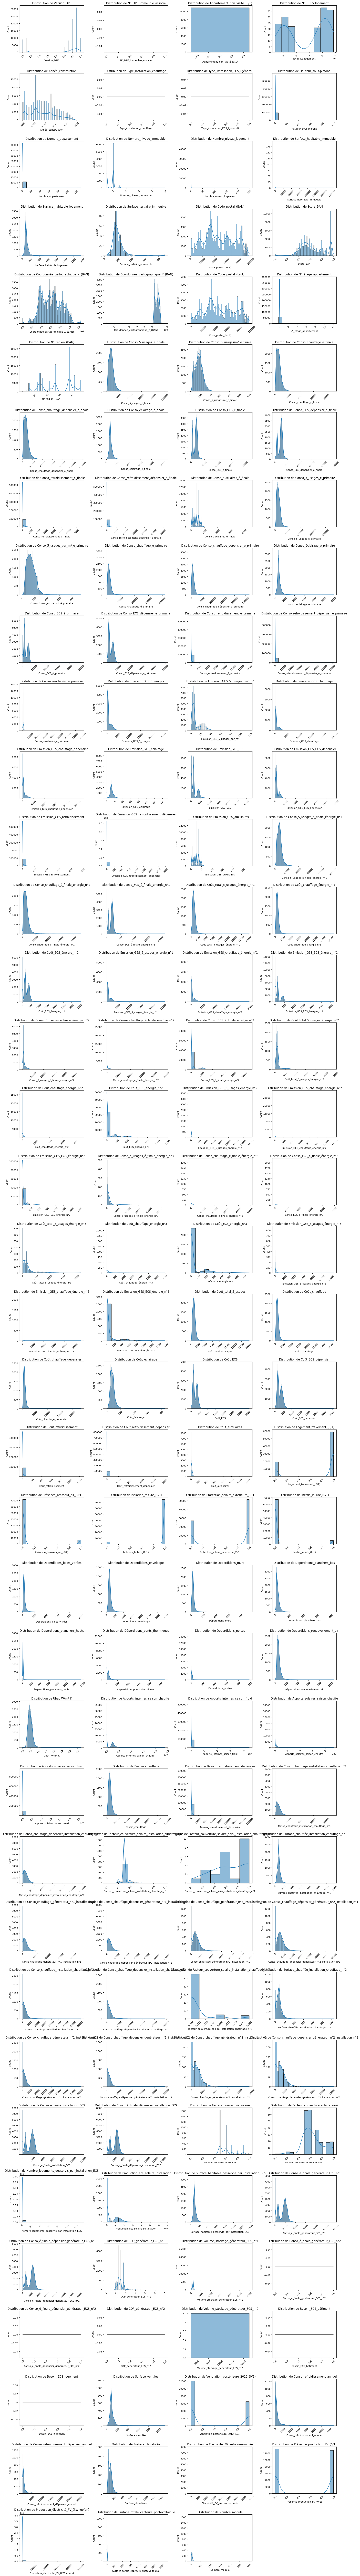

In [4]:
quality_report = analyze_data_quality(random_data)

Erreur lors du calcul des scores d'information mutuelle : Input X contains NaN.

CRÉATION DES VISUALISATIONS
Configuration du style Seaborn...

Création du pair plot (peut prendre un moment)...


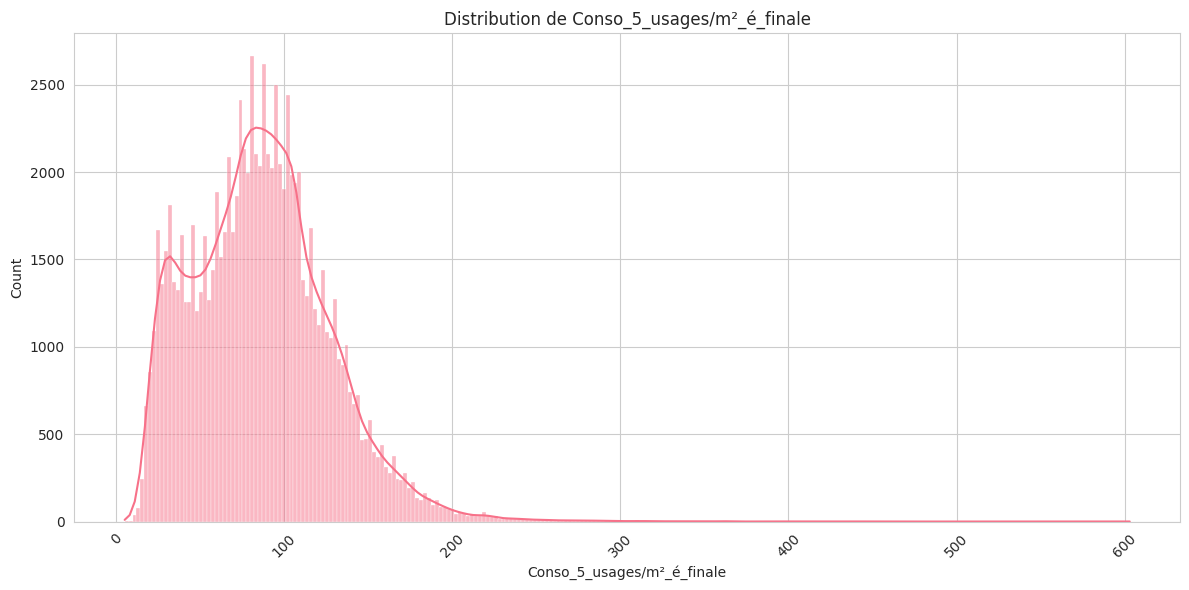

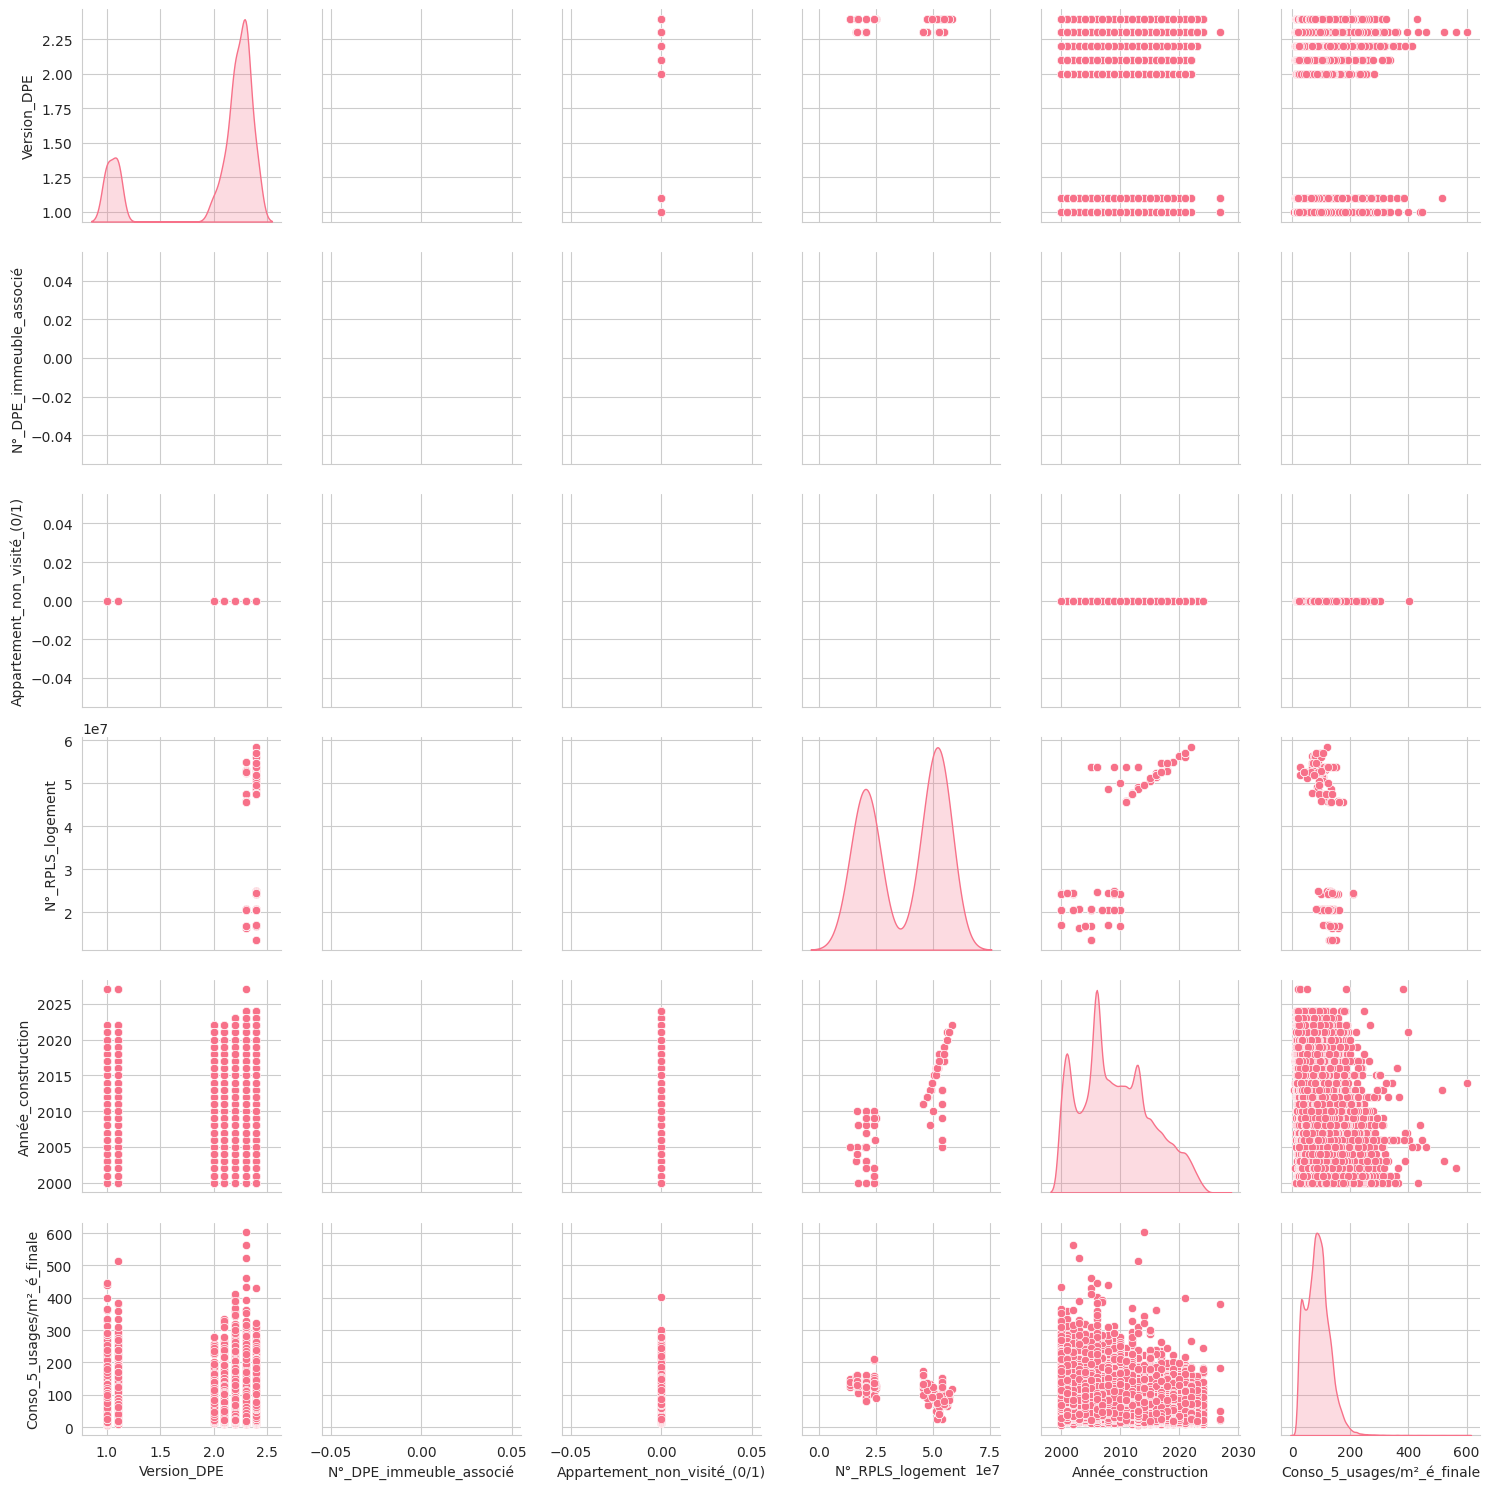

In [ ]:
analysis_results = analyze_target_relationships(
    random_data, "Conso_5_usages/m²_é_finale")